## With Forest-Type (UCI dataset)

In [6]:
## Importing
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import numpy as np
from evclust.utils import plotting, display_results_fuzzy_partition, display_results_evidential
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from evclust.datasets import load_crescent2D

from evclust.ecm import ecm
from evclust.wecm_new_barycenter import wecm
from evclust.fcm.fcm_keller2000 import fcm as fcm_keller2000
from evclust.fcm.fcm_wang2004 import fcm as fcm_wang2004
from evclust.fcm.fcm_frigui2004 import scad1
from evclust.fcm.fcm_frigui2004 import scad2
from evclust.fcm.ifwfcm_xing2014 import fcm as ifwfcm_xing2014
from evclust.fcm.ifwfcm_kd_xing2014 import fcm as ifwfcm_kd_xing2014

Instances: 1000; Features: 2; Clusters: 2    2
dtype: int64
          0         1
0  2.294199  0.801470
1  1.430259 -0.032017
2  1.595173  0.132108
3  1.401331  0.461149
4  0.535057  0.583439


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


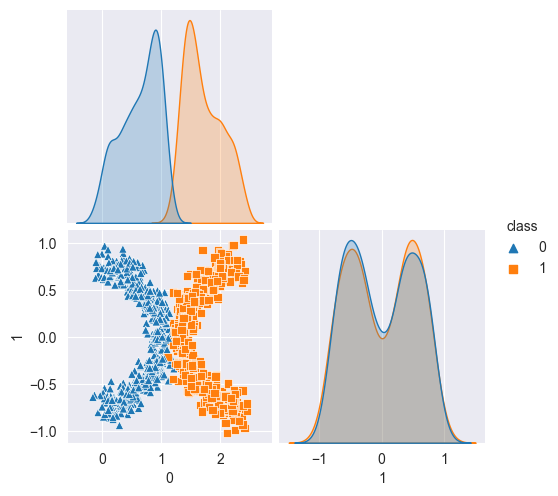

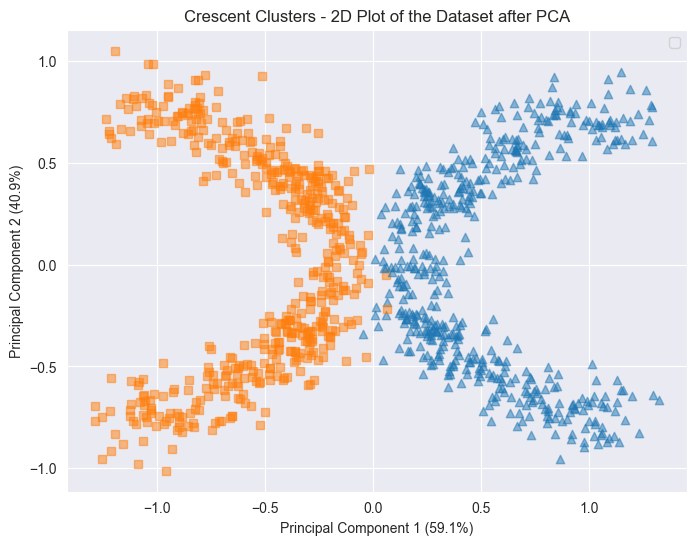

Instances: 1000; Features: 2; Clusters: 2    2
dtype: int64


In [139]:
### Thyroid dataset
# fetch dataset 
df = load_crescent2D()

# data (as pandas dataframes) 
X = df.iloc[:, :-1]
y = pd.DataFrame(df.iloc[:, -1])
c = 2

print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

markers = ['^', 's']
plotting(X, y, "Crescent Clusters", matrix_plot=True, markers=markers)
print(f"Instances: {X.shape[0]}; Features: {X.shape[1]}; Clusters: {y.nunique()}")

label_column_nm = y.columns[0]
labels_encoder = LabelEncoder()
numeric_labels = labels_encoder.fit_transform(y[label_column_nm])
# Normalization
# scaler = MinMaxScaler(feature_range=(0, 1))
# X = pd.DataFrame(scaler.fit_transform(X))

## Traditional ECM

In [155]:
%%capture
# Traditional ECM clustering
delta = np.sqrt(20)
ecm_models = np.array([])
for i in range(10):
    model = ecm(x=X, c=c, beta=2, alpha=1, delta=delta, init="None")
    ecm_models = np.append(ecm_models, model)

ecm_models = sorted(ecm_models, key=lambda x: x['crit'])

J values: [224.8354549978869, 224.83588154512995, 224.85551323311964, 224.8611220401729, 225.22762775234645, 225.24758807041778, 225.25174814906123, 225.25293864884586, 225.25304258961117, 225.25323819364922]
ARI values: [0.8170328760994647, 0.8170328760994647, 0.8352310984916881, 0.8352310984916881, 0.8170328760994647, 0.8499337889803443, 0.8536294853125533, 0.8536294923524174, 0.8536294923524174, 0.8536294923524174]
NS values: [1.1096217929345376, 1.1178894529820547, 1.1118458429943414, 1.1209473695248695, 1.1160086383509, 1.1275353241773314, 1.1272920269976898, 1.1170572644455912, 1.1170583382180441, 1.1277173426035]
NMI values: [0.7226637898413943, 0.7226637898413943, 0.7448919601320663, 0.7448919601320663, 0.7226637898413943, 0.7624690268981064, 0.7670259579754346, 0.7672419373961967, 0.7672419373961967, 0.7672419373961967]


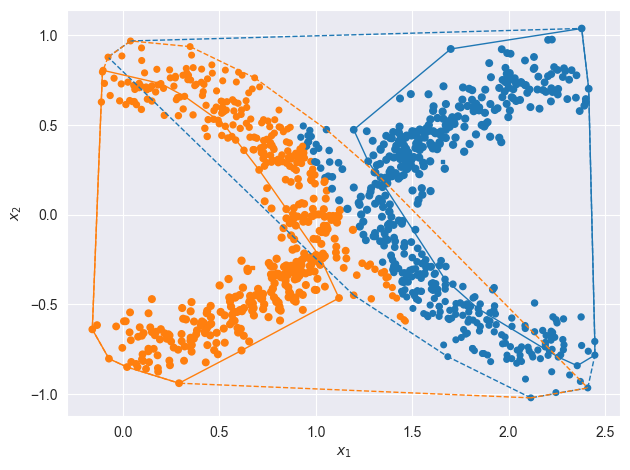

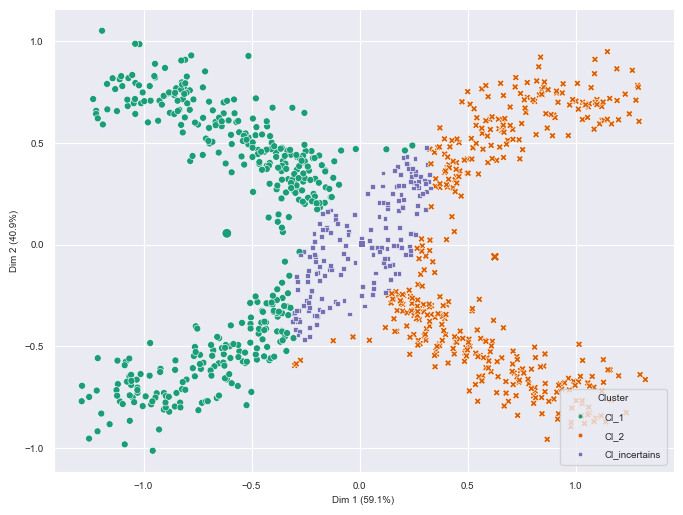

In [156]:
display_results_evidential(X, ecm_models, numeric_labels)

## Weighted ECM (WECM)

In [195]:
%%capture
wecm_models = np.array([])
d = X.shape[1]
delta = np.sqrt(20)
for i in range(10):
    model = wecm(x=X, c=c, beta=2, alpha=1, delta=delta, epsilon=1e-6)
    wecm_models = np.append(wecm_models, model)

wecm_models = sorted(wecm_models, key=lambda model: model['crit'])

J values: [45.6569310741723, 45.6569310741723, 45.6569310741723, 45.6569310741723, 45.6569310741723, 45.65693107417252, 45.65693107417252, 45.65693107417252, 45.65693107417252, 45.65693107417252]
ARI values: [0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965, 0.9682241944224965]
NS values: [1.2823566138010716, 1.2823566138010716, 1.2823566138010716, 1.2823566138010716, 1.2823566138010716, 1.3235518138534028, 1.3235518138534028, 1.3235518138534028, 1.3235518138534028, 1.3235518138534028]
NMI values: [0.9342752643999096, 0.9342752643999096, 0.9342752643999096, 0.9342752643999096, 0.9342752643999096, 0.9342752643999095, 0.9342752643999095, 0.9342752643999095, 0.9342752643999095, 0.9342752643999095]


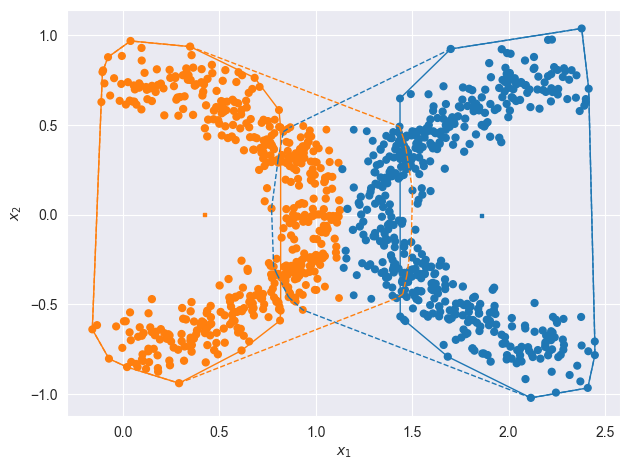

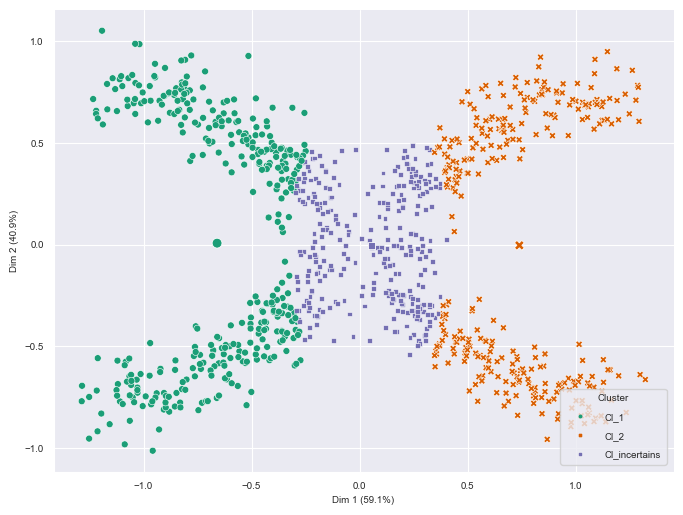

In [196]:
display_results_evidential(X, wecm_models, numeric_labels)

# Weighted FCM - Keller et al. 2000

In [175]:
%%capture
keller_models = np.array([])
# w0 = np.ones((c, X.shape[1])) / X.shape[1]
for i in range(10):
    model = fcm_keller2000(X, c=c, verbose=True)
    keller_models = np.append(keller_models, model)
keller_models = sorted(keller_models, key=lambda model: model['obj_func'])

J values: [64.9726245434654, 64.97262480891024, 64.97268733716992, 64.97286563515685, 64.972866629611, 64.97288452112188, 64.97293769595699, 64.97296470235008, 64.97297527645128, 64.97308191239]
ARI values: [0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048]
NMI values: [0.970780299319961, 0.970780299319961, 0.9707802993199612, 0.970780299319961, 0.970780299319961, 0.9707802993199612, 0.9707802993199612, 0.970780299319961, 0.970780299319961, 0.970780299319961]


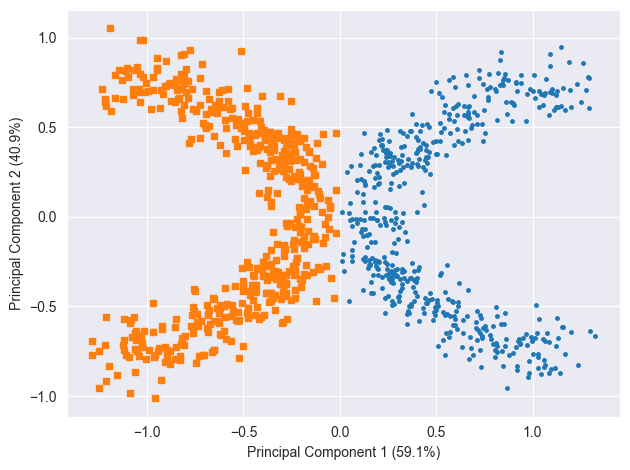

In [176]:
display_results_fuzzy_partition(X, keller_models, numeric_labels)

# Weighted FCM Wang 2004

In [191]:
%%capture
wang_models = np.array([])
for i in range(2):
    model = fcm_wang2004(X, c, w_beta=1.9, verbose=True)
    wang_models = np.append(wang_models, model)
wang_models = sorted(wang_models, key=lambda model: model['obj_func'])

KeyboardInterrupt: 

In [192]:
display_results_fuzzy_partition(X, wang_models, numeric_labels)

J values: [138.13724931031908]
ARI values: [0.988024012072048]
NMI values: [0.970780299319961]


KeyboardInterrupt: 

# SCAD1

In [177]:
%%capture
scad1_models = np.array([])
for i in range(10):
    model = scad1(X, c, verbose=True, K=2, epsilon=1e-6)
    scad1_models = np.append(scad1_models, model)
scad1_models = sorted(scad1_models, key=lambda model: model['obj_func'])


J values: [438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664, 438.2980701077664]
ARI values: [0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048]
NMI values: [0.970780299319961, 0.9707802993199612, 0.9707802993199612, 0.970780299319961, 0.9707802993199612, 0.970780299319961, 0.970780299319961, 0.9707802993199612, 0.970780299319961, 0.970780299319961]


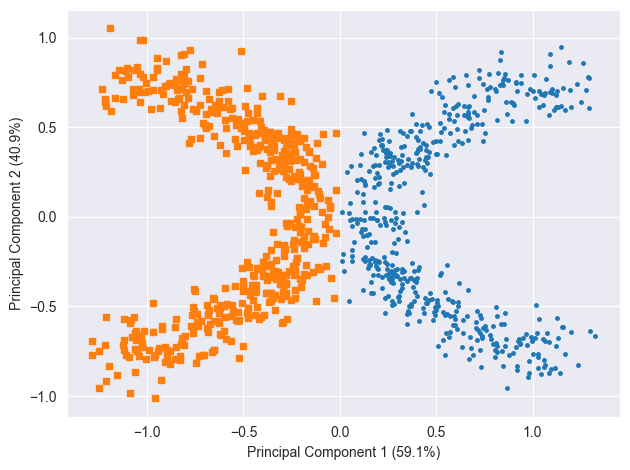

In [178]:
display_results_fuzzy_partition(X, scad1_models, numeric_labels)

# SCAD2

In [179]:
%%capture
scad2_models = np.array([])
for i in range(10):
    model = scad2(X, c, verbose=True, epsilon=1e-6)
    scad2_models = np.append(scad2_models, model)
scad2_models = sorted(scad2_models, key=lambda model: model['obj_func'])


J values: [66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440174192, 66.36823440309112]
ARI values: [0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048, 0.988024012072048]
NMI values: [0.970780299319961, 0.970780299319961, 0.9707802993199612, 0.970780299319961, 0.970780299319961, 0.970780299319961, 0.970780299319961, 0.9707802993199612, 0.9707802993199612, 0.970780299319961]


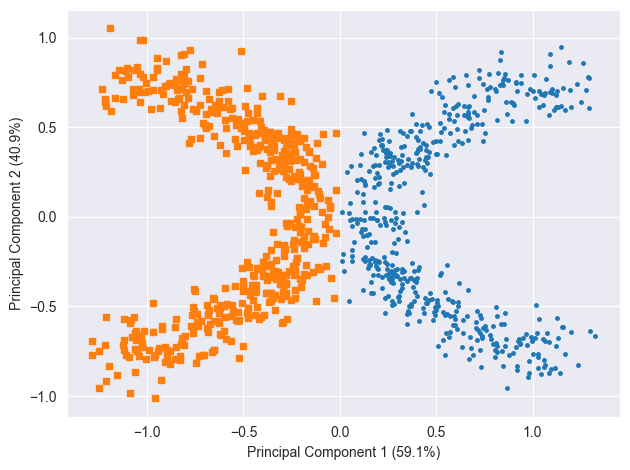

In [180]:
display_results_fuzzy_partition(X, scad2_models, numeric_labels)

# IFWFCM - Xing et al. 2014

In [187]:
%%capture
ifwfcm_models = np.array([])
for i in range(10):
    model = ifwfcm_xing2014(X, c, verbose=True)
    ifwfcm_models = np.append(ifwfcm_models, model)
ifwfcm_models = sorted(ifwfcm_models, key=lambda model: model['obj_func'])

J values: [42.79488906495579, 42.79488906495579, 42.794894212434805, 42.794894212434805, 42.794894212434805, 42.794894212434805, 42.794894212434805, 42.794894212434805, 42.794894212434805, 42.794894212434805]
ARI values: [-0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814]
NMI values: [0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197]


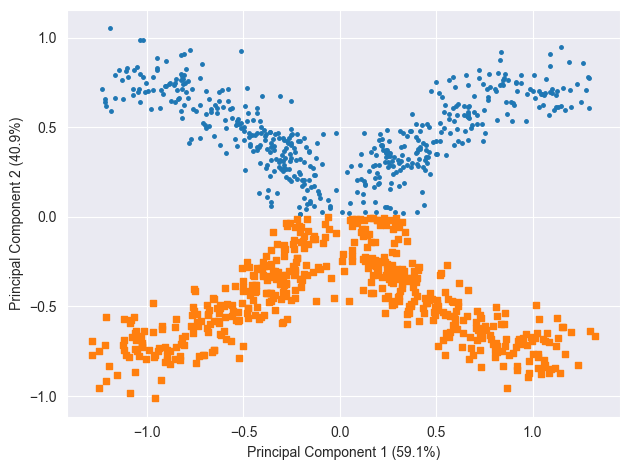

In [188]:
display_results_fuzzy_partition(X, ifwfcm_models, numeric_labels)

# IFWFCM_KD Xing 2014

In [189]:
%%capture
ifwfcm_kd_models = np.array([])
for i in range(10):
    model = ifwfcm_kd_xing2014(X, c, verbose=True)
    ifwfcm_kd_models = np.append(ifwfcm_kd_models, model)
ifwfcm_kd_models = sorted(ifwfcm_kd_models, key=lambda model: model['obj_func'])

J values: [56.966453720178606, 56.966453720178606, 56.96645552086957, 56.96645552086957, 56.96645552086957, 56.96645552086957, 56.96645552086957, 56.96645552086957, 56.96645552086957, 56.96645552086957]
ARI values: [-0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814, -0.000517194220870814]
NMI values: [0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197, 0.00034931440148596197]


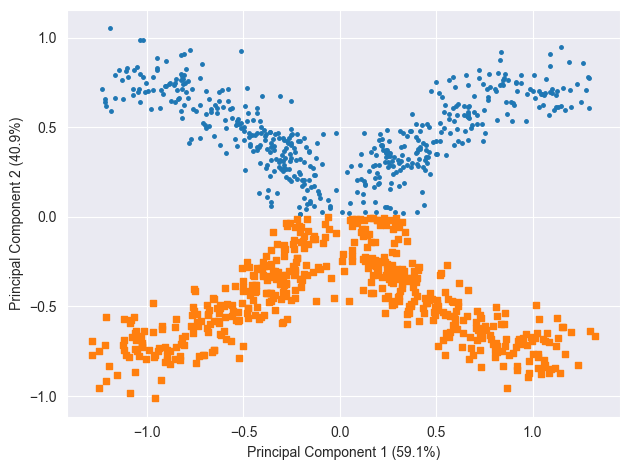

In [190]:
display_results_fuzzy_partition(X, ifwfcm_kd_models, numeric_labels)